<h1>Data Description</h1>

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import tree
from matplotlib.pylab import rcParams
warnings.filterwarnings('ignore')

This dataset contains customer information for Orange Telecom with the aim at using predictive models to forecast customer churn and develop/inform customer retention programs.

Let's take a look at the data

In [235]:
#Load csv and take a look at the format/values of the dataset
data = pd.read_csv('telecom_churn.csv')
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Each row corresponds to one customer and the definitions for each row is below:

| Variable | Description |
| :- | :- |
| State | Customer state |
| Account length | Customer tenure (in days) |
| Area code | Customer area code |
| International plan | If customer has international plan service |
| Voice mail plan | If customer has voicemail service |
| Number vmail messages | Count of voicemail messages|
| Total day minutes | Total minutes spent talking during the day |
| Total day calls | Count of calls made during the day |
| Total day charge | Total charge for calls made during the day |
| Total eve minutes | Total minutes spent talking during the evening |
| Total eve calls | Count of calls made during the evening |
| Total eve charge | Total charge for calls made during the evening |
| Total night minutes | Total minutes spent talking during the night |
| Total night calls | Count of calls made during the night |
| Total night charge | Total charge for calls made during the night |
| Total intl minutes | Total minutes spent talking internationally |
| Total intl calls | Count of calls made internationally |
| Total intl charge | Total charge for calls made internationally |
| Customer service calls | Count of calls customers call to customer service |
| Churn | Customer cancelled service |

For modelling purposes, we will use Churn as our target and all other variables as features.

<h1>Data exploration and cleanup</h1>

The dataset contains 3,333 rows and does not contain any null-values (seen by the non-null count for each columns) so we do not need to impute any values for our model. We do need to replace Boolean and yes/no columns to numeric 1/0, however. We also need to convert the Area Code column to a string to our model interprets each distinct area code as a category instead of its numeric value.

In [236]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

To simplify the inputs going into our model, we are not including the Total Charge columns as they can be derived from the Total Minutes columns. Proof of their correlation can be seen below. Similarly, we will not be including the International and Voice Mail Plan columns as those columns can be derived from the Intl Minutes/Calls and Number Vmail Messages columns respectively.

In [256]:
#Convert yes/no columns to 1/0
data.replace(to_replace='Yes', value=1, inplace=True)
data.replace(to_replace='No', value=0, inplace=True)

#Convert boolean values to 1/0
data['Churn']=data['Churn'].astype('int')

#Convert numeric Area code columns to a string
data['Area code'] = data['Area code'].apply(str)

In [257]:
print("Correlation between Total Day Charge and Total Day Minutes columns: ", data['Total day charge'].corr(data['Total day minutes']))
print("Correlation between Total Eve Charge and Total Eve Minutes columns: ", data['Total eve charge'].corr(data['Total eve minutes']))
print("Correlation between Total Night Charge and Total Night Minutes columns: ", data['Total night charge'].corr(data['Total night minutes']))

Correlation between Total Day Charge and Total Day Minutes columns:  0.9999999521903998
Correlation between Total Eve Charge and Total Eve Minutes columns:  0.9999997760198506
Correlation between Total Night Charge and Total Night Minutes columns:  0.9999992148758772


Finally, we will declare out model feature columns as well as the target variable and split the dataset into training and testing buckets.

In [245]:
feature_cols = ['Account length','Area code','Number vmail messages',
                'Total day minutes','Total day calls',
                'Total eve minutes','Total eve calls',
                'Total night minutes','Total night calls',
                'Total intl minutes','Total intl calls',
                'Customer service calls']
X = data[feature_cols]
y = data.Churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<h1> Finding 1: We can predict customer churn with 88% accuracy. </h1>

We tested multiple machine learning algorithms and compared their accuracy scores to see which model could predict customer Churn most accurately. The winning algorithm was the K-nearest neighbor algorithm with an accuracy of 88%.

In [246]:
#Logistic Regression
reg = LogisticRegression(solver='liblinear')
fit_reg = reg.fit(X_train, y_train)
y_lr_pred = reg.predict(X_test)

#K-Nearest Neighbor
kn = KNeighborsClassifier(n_neighbors=5)
fit_kn = kn.fit(X_train, y_train)
y_kn_pred = kn.predict(X_test)

#Decision Tree
dt = DecisionTreeClassifier()
fit_dt = dt.fit(X_train, y_train)
y_dt_pred = dt.predict(X_test)

#Support Vector Machine
svm = SVC()
fit_svm = svm.fit(X_train, y_train)
y_svm_pred = svm.predict(X_test)

In [247]:
#Classification report
print(classification_report(y_test, y_kn_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       855
           1       0.72      0.30      0.42       145

    accuracy                           0.88      1000
   macro avg       0.80      0.64      0.68      1000
weighted avg       0.87      0.88      0.86      1000



<h3> Managerial Insight </h3>

By being able to predict customer churn, we can flag certain customers with a high likelihood to cancel their subscription and reach out to try and resolve any issues they might have with our services. This targeted outreach can save on customer service expenses since we are only engaging with a subset of our entire customer base. </br>

Suggested next action item would be to run this model against our active customer base to see how many current customers are likely to cancel and provide that list to our customer service agents who can reach out to solve any outstanding issues with our service and ultimately increase customer retention.

<h3> Machine learning mastery </h3>

Most of the work for this insight was done in the data prepatation phase. It was crucial to ensure that our data was clean with regards to null values and that each feature column was the right type for our models to interpret. Once that was completed, the rest was relatively simple. Using the sklearn package we called multiple different models to run against our dataset and compared the accuracy scores to see which was the best. The results can be seen below. The K-nearest neighbor algorithm with n_neighbors = 5 was the winner in this case.

In [248]:
#Print out accuracy scores for each algorithm
print('Logistic Regression: ', accuracy_score(y_test, y_lr_pred))
print('K-Nearest Neighbor: ', accuracy_score(y_test, y_kn_pred))
print('Decision Tree: ', accuracy_score(y_test, y_dt_pred))
print('Support Vector Machine: ', accuracy_score(y_test, y_svm_pred))

Logistic Regression:  0.862
K-Nearest Neighbor:  0.881
Decision Tree:  0.876
Support Vector Machine:  0.855


<h1> Finding 2: An increase in daytime usage and customer service calls increases the likelihood for attrition </h1>

Customers who have to call customer service 4 or more times have an extremely high likelihood of churning as exhibited in the graph below. About half of customers that call 4 times have churned and that percentage increases for each increase in customer service calls.

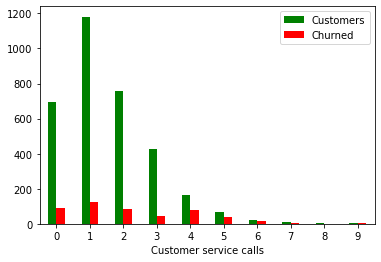

In [208]:
#Create dataframe with distribution of customer service calls and churn
CS = data.groupby(by='Customer service calls').agg({'Churn': ['size','sum']})
CS.reset_index(inplace=True)
CS.columns = 'Customer service calls', 'size','sum'


#Plot results against each other
ax = CS[["Customer service calls","size", "sum"]].plot(x='Customer service calls', 
                                                        kind='bar', 
                                                        color=["g","r"],
                                                        rot=0)
ax.legend(["Customers", "Churned"])

Similarly, customers with very high usage in the daytime are also very likely to churn as exhibited by the graph below. In general, we see that attrition goes down the more daytime minutes a customer has but goes up sharply past a certain point. Customers in the highest daytime usage category are the most likely to cancel their subscription.

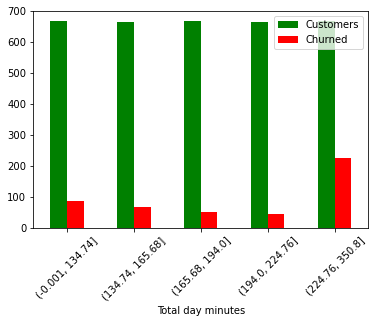

In [221]:
#Create dataframe with distribution of daytime minutes and churn
dm = data.groupby(by=pd.qcut(data['Total day minutes'], q=5)).agg({'Churn': ['size','sum']})
dm.reset_index(inplace=True)
dm.columns = 'Total day minutes', 'size','sum'


#Plot results against each other
ax_dm = dm[["Total day minutes","size", "sum"]].plot(x='Total day minutes', 
                                                        kind='bar', 
                                                        color=["g","r"],
                                                        rot=45)
ax_dm.legend(["Customers", "Churned"])

<h3> Managerial Insight </h3>

These insights can point to two different parts of the business that we can improve. The fact that more contact with customer service leads to increased attrition can suggest that our customer service agents are not trained properly to deal with issues quickly or can also suggest that our service could be upgraded to avoid customer service calls in the first place. The second insight of higher daytime usage leading to increased attrition adds to the hypothesis that perhaps we need to upgrade our systems. If our most power users are leaving the company, that must mean that after a certain point our system cannot handle their demands anymore. By upgrading our antennas, we can ensure that we retain our most active and valuable customers while also reducing customer service calls.

<h3> Machine learning mastery <?h3>

Using the results from the models ran for the previous insight, we can take a peak inside the algorithms that lend themselves to interpreting their results and see if certain features are more important than others and how they affect whether or not a customer will cancel. </br>

For example, we can look at feature importance from the decision tree results to see which features affects the Churn prediction the most. Here we can see that daytime minutes and customer service calls are among the top three features.

In [224]:
#Display feature importance values from the decision tree model
imp = pd.DataFrame(fit_dt.feature_importances_, np.array(feature_cols))
imp.reset_index(inplace=True)
imp.rename(columns={'index': 'Feature', 0: 'Importance'}, inplace=True)
imp.sort_values(by='Importance', ascending=False)

,Feature,Importance
3,Total day minutes,0.267138
5,Total eve minutes,0.144168
11,Customer service calls,0.116919
2,Number vmail messages,0.080010
4,Total day calls,0.079891
7,Total night minutes,0.077438
9,Total intl minutes,0.064166
0,Account length,0.055897
6,Total eve calls,0.046558
10,Total intl calls,0.030851


In addition, when we look at the sign of the coefficients from the logistic regression and see whether or not an increase in daytime minutes and customer service calls increase or decrease the likelihood of attrition. Here we see that both features are positive meaning that an increase in daytime minutes and customer service calls has a positive correlation with churn.

In [225]:
#Display coefficient values from logistic regression
pd.DataFrame(reg.coef_, columns=feature_cols)

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls
0,-0.000504,-0.003621,-0.025541,0.011165,0.000221,0.005504,-0.003023,0.000734,-0.00346,0.071943,-0.068698,0.436626


<h1> Finding 3: We can predict whether a customer will sign up for an International Plan with 90% accuracy </h1>

We tested multiple machine learning algorithms and compared their accuracy scores to see which model could predict if a customer had an International Plan most accurately. The winning algorithm was the logistic regression and support vector machine algorithms with an accuracy of 90%.

In [252]:
#Assign new feature and target columns for models to predict International Plan
intl_cols = ['Area code','Number vmail messages',
                'Total day minutes','Total day calls',
                'Total eve minutes','Total eve calls',
                'Total night minutes','Total night calls',
                'Customer service calls']
X_intl = data[intl_cols]
y_intl = data['International plan']
X_intl_train, X_intl_test, y_intl_train, y_intl_test = train_test_split(X_intl, y_intl, test_size=0.3)

In [253]:
#Logistic Regression
reg_intl = LogisticRegression(solver='liblinear')
fit_intl_reg = reg_intl.fit(X_intl_train, y_intl_train)
y_lr_intl_pred = reg_intl.predict(X_intl_test)

#K-Nearest Neighbor
kn_intl = KNeighborsClassifier(n_neighbors=5)
fit__intlkn = kn_intl.fit(X_intl_train, y_intl_train)
y_kn_intl_pred = kn_intl.predict(X_intl_test)

#Decision Tree
dt_intl = DecisionTreeClassifier()
fit__intldt = dt_intl.fit(X_intl_train, y_intl_train)
y_dt_intl_pred = dt_intl.predict(X_intl_test)

#Support Vector Machine
svm_intl = SVC()
fit_intl_svm = svm_intl.fit(X_intl_train, y_intl_train)
y_svm_intl_pred = svm_intl.predict(X_intl_test)

In [254]:
#Print out accuracy scores for each algorithm
print('Logistic Regression: ', accuracy_score(y_intl_test, y_lr_intl_pred))
print('K-Nearest Neighbor: ', accuracy_score(y_intl_test, y_kn_intl_pred))
print('Decision Tree: ', accuracy_score(y_intl_test, y_dt_intl_pred))
print('Support Vector Machine: ', accuracy_score(y_intl_test, y_svm_intl_pred))

Logistic Regression:  0.898
K-Nearest Neighbor:  0.895
Decision Tree:  0.803
Support Vector Machine:  0.898


In [255]:
#Classification report
print(classification_report(y_intl_test, y_lr_intl_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       898
           1       0.00      0.00      0.00       102

    accuracy                           0.90      1000
   macro avg       0.45      0.50      0.47      1000
weighted avg       0.81      0.90      0.85      1000



<h3> Managerial Insight </h3>

By being able to predict whether or not a customer has a need for our International Plan, we can direct targeted advertisements to them and get them to sign up before they might on their own or if they do not know that we offer an International Plan. This also reduces the risk of customers cancelling their subscription and going to a competitor that might also offer an International Plan. Similar to the model predicting churn, we can run the winning algorithm on our existing customer base to see which customers that do not have an International Plan with us are most likely to need one and give that list to our marketing team. The marketing team can then use the list to target these customers with advertisements informing them of our International Plan, increasing profits if they sign up.

<h3> Machine learning mastery Insight </h3>

The process for getting this insight is very similar to the first insight but we needed to choose different feature and target columns to change what our models we predicting. These new sets of data then had to be split into testing and training buckets which the new models used. Interestingly, the support vector machine and logistic regression algorithms were tied for first as the most accurate model instead of the K-nearest neighbor model that was best for predicting Churn.